CNN

* Conv2D (filters)
* Maxpool (takes the max value from a subset of array)
* Visualizing each layers o/p

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Load Dataset

In [2]:
mnist = tf.keras.datasets.mnist
(train_data,train_label),(test_data,test_label) = mnist.load_data()

In [3]:
train_data.shape

(60000, 28, 28)

In [4]:
test_data.shape

(10000, 28, 28)

In [5]:
train_label.shape

(60000,)

Normalize data

In [6]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Function to display images

In [7]:
def display_images(data,label,n=25,pred=None):
    '''Function to display images'''
    a = int( np.ceil(np.sqrt(n))) # calculate the value for subplot nrows and ncols
    for i in range(n):
        idx = np.random.randint(low=0,high=data.shape[0]+1)
        plt.subplot(a,a,i+1)
        plt.axis('off')
        plt.imshow(data[idx])
        plt.title(f"{label[idx]}" if pred is None else f"(A:{label[idx]},P:{pred[idx]})")
    plt.tight_layout()
    plt.show()

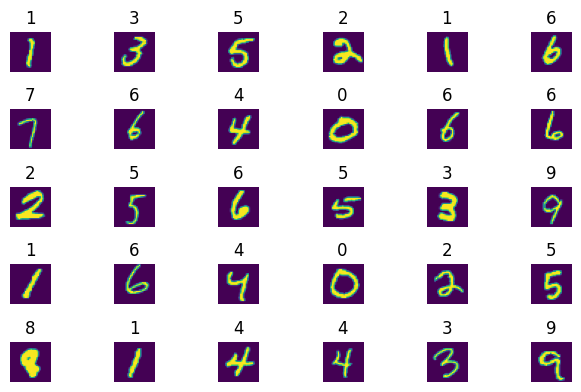

In [8]:
display_images(train_data,train_label,30)

Initialize and compile model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    # convolution layer(create a 3X3 matrix and multiply it with corresponding value in the image matrix)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # max filtering (filter the maximum value from each 2X2 matrix and replace that matrix by that single value)
    tf.keras.layers.MaxPooling2D(2, 2),
    # repeat
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # flatten the input into one dimensional
    tf.keras.layers.Flatten(),
    # create a hidden dense layer
    tf.keras.layers.Dense(units=128, activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=10, activation='softmax')
])
# compile model using adam optimizer and spatialcategoricalentropy as loss function and accuray as metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

CutomCallbacks

In [11]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] < 0.1 and logs['accuracy'] > 0.98:
            self.model.stop_training = True

Train model

In [12]:
model.fit(train_data,train_label,epochs=100,callbacks=[CustomCallback()])

Epoch 1/100
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1224 - accuracy: 0.9628
Epoch 2/100
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0402 - accuracy: 0.9874


Inference Model

In [13]:
predictions = model.predict(test_data)

313/313 [==============================] - 4s 11ms/step


Select Predicted Class

In [14]:
predicted_classes = np.argmax(predictions,axis=1)

Verify Predictions

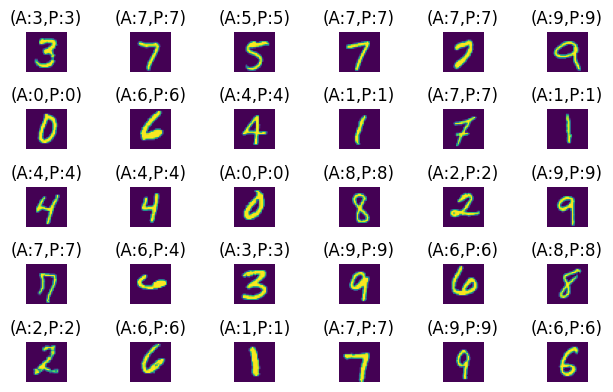

In [15]:
display_images(test_data,test_label,30,predicted_classes)

Accuracy of prediction

In [16]:
accuracy_score(predicted_classes,test_label)

0.9905

Visulazing layers

In [ ]:
layers_to_visualize = [tf.keras.layers.Conv2D,tf.keras.layers.MaxPooling2D]
layers_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs=model.input,outputs=layers_outputs)

In [18]:
layers_to_visualize

[keras.layers.convolutional.conv2d.Conv2D,
 keras.layers.pooling.max_pooling2d.MaxPooling2D]

In [19]:
layers_outputs

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>]

In [20]:
activation_model

In [21]:
print(f"9 Labels {[i for i in range(100) if test_label[i] == 9]}")

9 Labels [7, 9, 12, 16, 20, 58, 62, 73, 78, 92, 99]


In [22]:
IMG = [7,9,20]

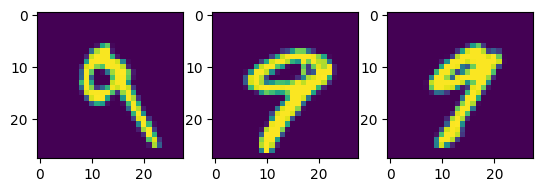

In [23]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(test_data[IMG[i]])
plt.show()

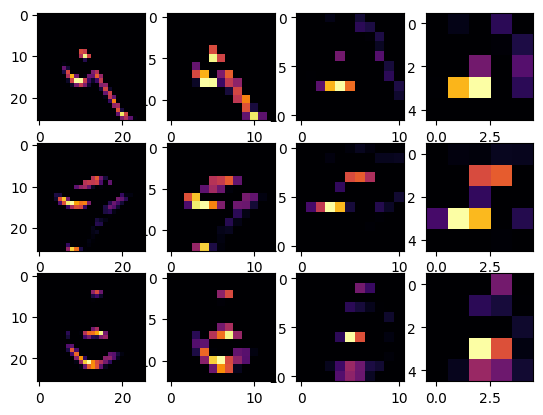

In [28]:
FIRST_IMAGE = 7
SECOND_IMAGE = 9
THIRD_IMAGE = 21
CONVOLUTION_NUMBER = 30
layers_to_visualize = [tf.keras.layers.Conv2D,tf.keras.layers.MaxPooling2D]
layers_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs=model.input,outputs=layers_outputs)
f, axarr = plt.subplots(3,len(layers_outputs))

for x in range(len(layers_outputs)):
    f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1,28,28,1),verbose=False)[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1,28,28,1),verbose=False)[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1,28,28,1),verbose=False)[x]
    axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[2,x].grid(False)